In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from src.features.feature import Feature

In [21]:
players_path = 'data/Players'
players = os.listdir(players_path)
#players = pd.read_csv(players[0])

In [22]:
players

['Players_2015.csv',
 'Players_2010.csv',
 'Players_2011.csv',
 'Players_2013.csv',
 'Players_2014.csv',
 'Players_2016.csv',
 'Players_2017.csv',
 'Players_2012.csv']

In [23]:
plyr_dir = "data/Players"
plyr_paths = os.listdir(plyr_dir)

plyr_2016_path = os.path.join(plyr_dir,plyr_paths[0])
plyr_df = pd.read_csv(plyr_2016_path)

event_dir = "data/Events"
events_paths = os.listdir(event_dir)

evnt_2016_path = os.path.join(event_dir,events_paths[0])
events_df = pd.read_csv(evnt_2016_path)


In [24]:
plyr_df.head()

,PlayerID,Season,TeamID,PlayerName
0,626432,2015,1101,ALBRIGHT_CHRISTIAN
1,626433,2015,1101,COOKE_AUSTIN
2,626434,2015,1101,GRANT_MICHAEL
3,626435,2015,1101,GREEN_DRAKE
4,626436,2015,1101,HANSON_DAVID


In [26]:
events_df.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,15252382,2016,11,1104,1244,0,0,13,1104,631933,miss2_lay
1,15252383,2016,11,1104,1244,0,0,13,1104,631933,reb_off
2,15252384,2016,11,1104,1244,0,0,16,1244,634018,foul_pers
3,15252385,2016,11,1104,1244,0,0,16,1104,631933,miss1_free
4,15252386,2016,11,1104,1244,0,0,16,1104,631934,reb_dead


In [47]:
indiv_df = pd.pivot_table(events_df, values='EventID', index=['EventPlayerID', 'EventTeamID'], 
                   columns='EventType', aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All')

In [115]:
# indiv_df = indiv_df.reset_index(level=['EventPlayerID', 'EventTeamID'])
game_id = []
for idx,row in events_df[['Season', 'DayNum', 'WTeamID', 'LTeamID']].iterrows():
    a, b, c, d = row
    game_id.append(str(a) + '_' + str(b) + '_' + str(c) + '_' + str(d))
game_id[:3]

['2016_11_1104_1244', '2016_11_1104_1244', '2016_11_1104_1244']

In [125]:
# indiv_df['game_id'] = game_id

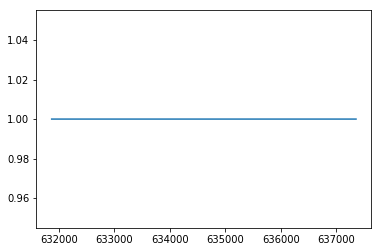

In [134]:
plt.plot(indiv_df.groupby('EventPlayerID')['EventPlayerID'].count())
plt.show()

In [56]:
switch_events = ["turnover", "steal", "made2_dunk", "made2_jump","made2_lay","made2_tip", "made3_jump"]
point_events = ["made2_dunk", "made2_jump","made2_lay","made2_tip", "made3_jump", "made1_free"]
miss_events = ['miss1_free' 'miss2_dunk', 'miss2_jump', 'miss2_lay', 'miss2_tip', 'miss3_jump']
rebound_events = ['reb_dead', 'reb_def', 'reb_off']
foul_events = ['foul_pers', 'foul_tech']

In [119]:
# https://stats.nba.com/
#indiv_df.filter(items=['one', 'three'])

In [122]:
indiv_df.loc[indiv_df['EventPlayerID'] == 631933]

EventType,EventPlayerID,EventTeamID,assist,block,foul_pers,foul_tech,made1_free,made2_dunk,made2_jump,made2_lay,...,miss3_jump,reb_dead,reb_def,reb_off,steal,sub_in,sub_out,timeout,timeout_tv,turnover
59,631933,1104,13.0,59.0,85.0,NaN,36.0,24.0,23.0,20.0,...,NaN,NaN,101.0,53.0,17.0,86.0,137.0,NaN,NaN,41.0


In [ ]:
dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

In [117]:
# function to count specified features per player per game
class Players:
    def __init__(self, id):
        self.id = id
        self.df = indiv_df.loc[indiv_df['EventPlayerID'] == self.id ]
    def get_player_stats(self, event_type):
        self.event_points = int(self.df[event_type].sum(axis=1))
        return self.event_points
    def get_stats_per_game(self):
        pass
        
        
    

In [118]:
a = Players(631874)
a.get_player_stats(point_events)
# a.event_points

84

In [104]:
int(a.df[foul_events].sum(axis=1))

60

In [93]:
filter(lambda x: x == a.id, a.event_points)